# LIBRARY

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
%matplotlib inline

plt.style.use('fivethirtyeight')

# DATA ANALYSIS & CLEANING

In [129]:
#Load Data!
train= pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
sample_submisson= pd.read_csv("data/sample_submission.csv")

* index 구분자
* quality 품질
* fixed acidity 산도
* volatile acidity 휘발성산
* citric acid 시트르산
* residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
* chlorides 염화물
* free sulfur dioxide 독립 이산화황
* total sulfur dioxide 총 이산화황
* density 밀도
* pH 수소이온농도
* sulphates 황산염
* alcohol 도수
* type 종류

In [130]:
#drop index column
train= train.drop(['index'],axis=1)
train.head(5)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [131]:
train.shape, test.shape

((5497, 13), (1000, 13))

In [132]:
df = train
df_quality = df['quality']
df_type = df['type']
df = df.drop(['quality', 'type'], axis=1)

In [133]:
df_white = np.array([0 for _ in range(len(df_type))])
df_red = np.array([0 for _ in range(len(df_type))])
print(len(df_white))

i = 0

for item in df_type:
    if(item == 'white'):
        df_white[i] = 1
        df_red[i] = 0
    else:
        df_white[i] = 0
        df_red[i] = 1
        
    i += 1
    
print(df_white)

5497
[1 0 1 ... 1 1 1]


In [134]:
df['white wine'] = df_white
df['red wine'] = df_red
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white wine,red wine
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1,0
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0,1
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1,0
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1,0
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,1,0
5493,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,1,0
5494,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,1,0
5495,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,1,0


# free sulfur dioxide outlier 값 제거

In [135]:
cnt = []
for i in range(len(df)):
    if df['free sulfur dioxide'][i] > 250:
        cnt.append(i)
        print(df['free sulfur dioxide'][i], i)
        
df_drop = df.drop(cnt)
print(len(df_drop))

289.0 5402
5496


In [136]:
df_drop = df_drop.reset_index(drop=True)

# residual sugar outlier 값 제거

In [137]:
cnt = []

for i in range(len(df_drop)):
    if df['residual sugar'][i] > 60:
        cnt.append(i)
        print(df['residual sugar'][i], i)
        
df_drop = df_drop.drop(cnt)
cnt

65.8 1220


[1220]

In [138]:
df_drop = df_drop.reset_index(drop=True)

# density outlier 값 제거

In [139]:
cnt = []

for i in range(len(df_drop)):
    if df_drop['density'][i] > 1.03:
        cnt.append(i)
        print(df_drop['density'][i], i)
        
df_drop = df_drop.drop(cnt)
print(cnt)

[]


<AxesSubplot:>

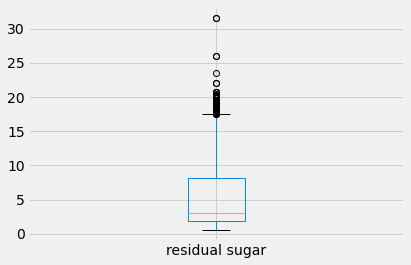

In [140]:
train_drop.boxplot(column=['residual sugar'])

<AxesSubplot:>

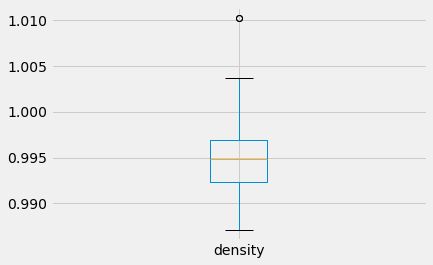

In [141]:
train_drop.boxplot(column=['density'])

<AxesSubplot:>

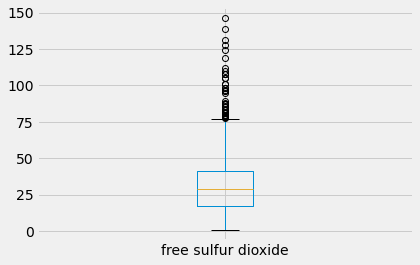

In [142]:
train_drop.boxplot(column=['free sulfur dioxide'])

In [143]:
len(df_drop)

5495

## MinMax Normalization

In [145]:
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white wine,red wine
0,0.148760,0.410000,0.036145,0.095092,0.054908,0.027778,0.179724,0.139001,0.551181,0.123596,0.318841,1.0,0.0
1,0.413223,0.353333,0.084337,0.027607,0.096506,0.031250,0.082949,0.188741,0.354331,0.207865,0.217391,0.0,1.0
2,0.338843,0.086667,0.234940,0.021472,0.079867,0.069444,0.304147,0.089647,0.244094,0.168539,0.420290,1.0,0.0
3,0.264463,0.086667,0.186747,0.082822,0.061564,0.097222,0.235023,0.130904,0.409449,0.157303,0.405797,1.0,0.0
4,0.330579,0.213333,0.156627,0.136503,0.083195,0.107639,0.396313,0.161751,0.236220,0.117978,0.420290,1.0,0.0


In [146]:
X = scaled_df
y = df_quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [152]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3847, 13) (3847,)
(1650, 13) (1650,)


In [153]:
X_train.to_csv('x_train.csv', index=False)
X_test.to_csv('x_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)